In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df=pd.read_csv('state_TX.csv')

<ipython-input-26-da44a0d69897>:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('state_TX.csv')


In [27]:
df

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2023,549300JOT0D4J0SZIK67,31180,TX,48303.0,4.830300e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,2211,57.49,84300,84.46,378,1124,59
1,2023,549300JOT0D4J0SZIK67,28660,TX,48281.0,4.828195e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3783,33.49,76500,108.60,1320,1706,25
2,2023,549300JOT0D4J0SZIK67,99999,TX,48179.0,4.817995e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,1606,67.75,73200,47.96,349,895,63
3,2023,549300JOT0D4J0SZIK67,99999,TX,48117.0,4.811795e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3516,57.59,73200,106.93,946,1689,53
4,2023,549300JOT0D4J0SZIK67,21340,TX,48141.0,4.814101e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,10351,84.00,63100,102.33,1630,2351,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037496,2023,549300JOT0D4J0SZIK67,11100,TX,48381.0,4.838102e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,4867,24.41,87300,140.19,1677,1917,39
1037497,2023,549300JOT0D4J0SZIK67,41700,TX,48029.0,4.802918e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3920,75.28,89100,91.11,1090,1415,34
1037498,2023,549300JOT0D4J0SZIK67,48660,TX,48485.0,4.848501e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5262,21.42,83800,100.32,1415,2102,44
1037499,2023,549300JOT0D4J0SZIK67,47380,TX,48309.0,4.830900e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,8059,73.59,84300,67.64,1665,2578,59


In [21]:
df["derived_msa-md"].value_counts()

,count
derived_msa-md,
26420,10899
19124,7843
23104,4403
41700,4351
12420,3862
99999,3056
28660,943
21340,857
13140,787


In [ ]:
len(df["derived_msa-md"].value_counts())

30

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

df2 = pd.DataFrame({'derived_msa-md': df['derived_msa-md'].value_counts().index,
                    'DISTRIBUTION_COLUMN': df['derived_msa-md'].value_counts().values})

# Load the California MSA boundaries (you'll need to get this file)
msa_boundaries = gpd.read_file("/content/cb_2021_06_bg_500k.shp")

# Merge the DataFrame with the GeoDataFrame (msa_boundaries)
merged = msa_boundaries.merge(df2, left_on='GEOID', right_on="derived_msa-md", how="left")

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax)  # Plot boundaries
merged.plot(column='DISTRIBUTION_COLUMN', ax=ax, legend=True, cmap="OrRd")  # Color by distribution

plt.title("Distribution of Individuals in California MSAs")
plt.show()


ValueError: You are trying to merge on object and int64 columns for key 'GEOID'. If you wish to proceed you should use pd.concat

In [ ]:
pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:687: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 1.
  self._classify()


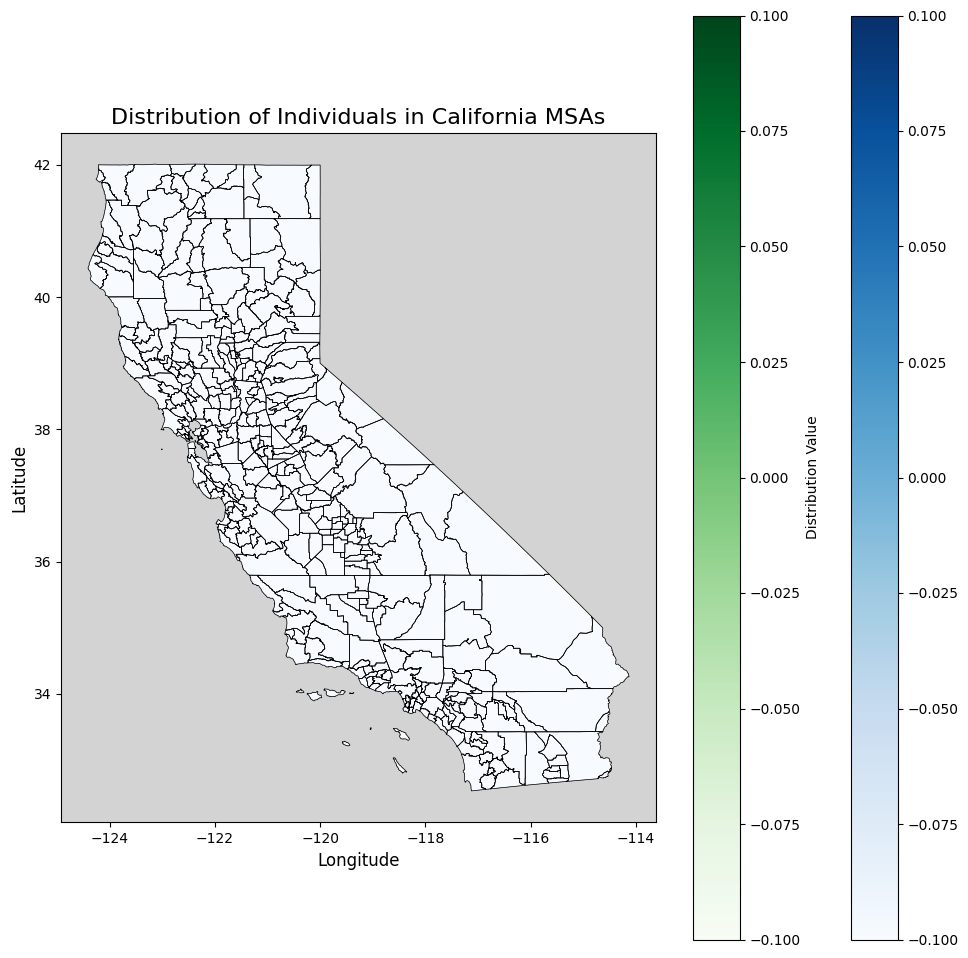

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import mapclassify

# Sample DataFrame creation for demonstration purposes
# df = pd.DataFrame({
#     'derived_msa-md': [12345, 67890, 23456],  # Example MSA codes
#     'DISTRIBUTION_COLUMN':

df2['derived_msa-md'] = df2['derived_msa-md'].astype(str)
# Load the California MSA boundaries (make sure to provide the correct file path)
msa_boundaries = gpd.read_file("/content/cb_2018_06_cousub_500k.shp")
msa_boundaries['msa_code'] = msa_boundaries['GEOID'].str[:5]

# Merge the DataFrame with the GeoDataFrame (msa_boundaries)
merged = msa_boundaries.merge(df2, left_on='msa_code', right_on="derived_msa-md", how="left")

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot boundaries in black
merged.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Classify the data
classifier = mapclassify.NaturalBreaks(5)  # Adjust the number of classes as needed
merged['classification'] = classifier(merged['DISTRIBUTION_COLUMN'])

# Plot the distribution in shades of green
merged.plot(column='classification', ax=ax, legend=True, cmap="Blues", edgecolor='black', linewidth=0.1)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=merged['DISTRIBUTION_COLUMN'].min(), vmax=merged['DISTRIBUTION_COLUMN'].max()))
sm._A = []
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Distribution Value')

# Aesthetic improvements
plt.title("Distribution of Individuals in California MSAs", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(False)  # Hide grid lines
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.set_facecolor('lightgrey')  # Set a light grey background for better contrast

# Show the plot
plt.show()


In [ ]:
# prompt: give me a data frame df2 that contain two columns
# the first is "derived_msa-md"  is the value_count of this value in df

df2 = pd.DataFrame({'derived_msa-md': df['derived_msa-md'].value_counts().index,
                    'DISTRIBUTION_COLUMN': df['derived_msa-md'].value_counts().values})


In [ ]:
msa_boundaries['msa_code']

,msa_code
0,06071
1,06063
2,06023
3,06031
4,06013
...,...
392,06067
393,06107
394,06107
395,06065


In [ ]:
# prompt: select the values that are in msa_boundaries['msa_code'] and df2['derived_msa-md']

common_values = set(msa_boundaries["COUSUBFP"]).intersection(set(df2['derived_msa-md']))
print(common_values)


set()


In [ ]:
msa_boundaries

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,msa_code
0,06,071,91513,01935015,0600000US0607191513,0607191513,Lake Arrowhead,22,413700934,7329972,"POLYGON ((-117.48207 34.33312, -117.48141 34.3...",06071
1,06,063,91170,01935122,0600000US0606391170,0606391170,Greenville,22,1205142481,5618053,"POLYGON ((-121.05021 40.18248, -121.04979 40.1...",06063
2,06,023,90930,01935097,0600000US0602390930,0602390930,Eureka,22,367068605,24238849,"POLYGON ((-124.23314 40.71942, -124.23111 40.7...",06023
3,06,031,90570,01935061,0600000US0603190570,0603190570,Corcoran,22,52054076,0,"POLYGON ((-119.60818 36.09935, -119.60783 36.1...",06031
4,06,013,93310,01935336,0600000US0601393310,0601393310,Tassajara,22,395946934,7455991,"POLYGON ((-121.95198 37.83246, -121.95162 37.8...",06013
...,...,...,...,...,...,...,...,...,...,...,...,...
392,06,067,92555,01935197,0600000US0606792555,0606792555,Rancho Cordova,22,180530169,1562524,"POLYGON ((-121.38285 38.56676, -121.36486 38.5...",06067
393,06,107,90760,01935080,0600000US0610790760,0610790760,Earlimart,22,621392301,295053,"POLYGON ((-119.53769 35.93478, -119.47371 35.9...",06107
394,06,107,93330,01935338,0600000US0610793330,0610793330,Terra Bella,22,343542060,82605,"POLYGON ((-119.10768 35.9208, -119.10742 35.97...",06107
395,06,065,90880,01935092,0600000US0606590880,0606590880,Elsinore Valley,22,497859204,15544264,"POLYGON ((-117.67505 33.86872, -117.67161 33.8...",06065


In [ ]:
df2['derived_msa-md']

,derived_msa-md
0,31084
1,40140
2,41740
3,36084
4,40900
5,11244
6,41884
7,41940
8,99999
9,12540


In [ ]:
print(merged['GEOID'].unique())
print(df['derived_msa-md'].unique())

['060730073032' '060372976013' '060014283023' ... '060816021003'
 '060371397031' '060710097124']
['40140' '40900' '23420' '31084' '36084' '37100' '32900' '12540' '41740'
 '25260' '47300' '11244' '31460' '42220' '33700' '46700' '99999' '39820'
 '49700' '41940' '20940' '42020' '44700' '42200' '42100' '41884' '42034'
 '17020' '41500' '34900']


In [23]:
df.groupby('derived_race')["derived_race"].count()

,derived_race
derived_race,
2 or more minority races,57
American Indian or Alaska Native,155
Asian,2200
Black or African American,1776
Free Form Text Only,36
Joint,492
Native Hawaiian or Other Pacific Islander,64
Race Not Available,21289
White,16621


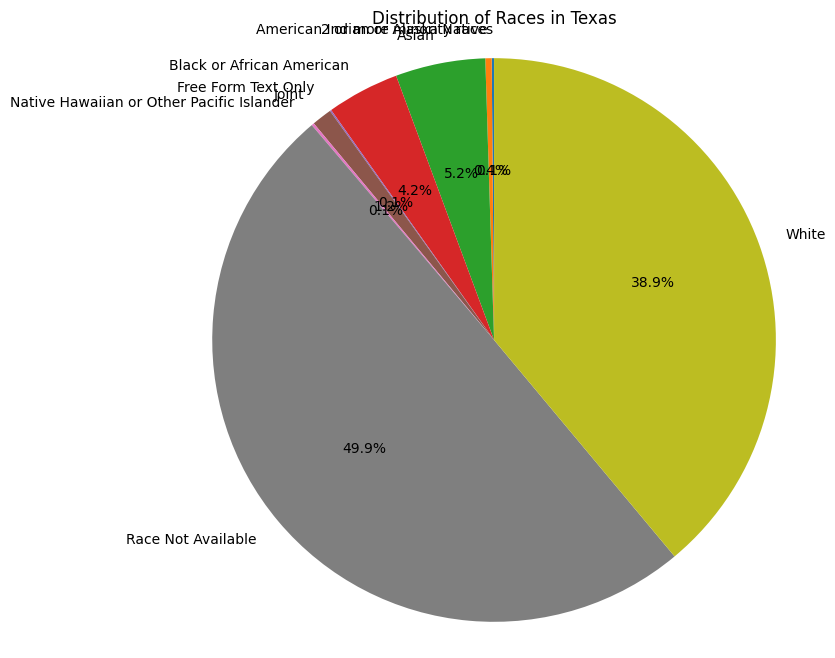

In [22]:
# prompt: give me a pie chart of the previous results

race_counts = df.groupby('derived_race')["derived_race"].count()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Races in Texas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [17]:
import pandas as pd
from tabulate import tabulate

# Créer un DataFrame avec vos données
data = {
    'derived_race': [
        '2 or more minority races',
        'American Indian or Alaska Native',
        'Asian',
        'Black or African American',
        'Free Form Text Only',
        'Joint',
        'Native Hawaiian or Other Pacific Islander',
        'Race Not Available',
        'White'
    ],
    'count': [
        76,
        316,
        2194,
        2495,
        35,
        739,
        39,
        8950,
        18307
    ]
}

df = pd.DataFrame(data)

# Afficher le tableau avec 'tabulate'
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))


╒════╤═══════════════════════════════════════════╤═════════╕
│    │ derived_race                              │   count │
╞════╪═══════════════════════════════════════════╪═════════╡
│  0 │ 2 or more minority races                  │      76 │
├────┼───────────────────────────────────────────┼─────────┤
│  1 │ American Indian or Alaska Native          │     316 │
├────┼───────────────────────────────────────────┼─────────┤
│  2 │ Asian                                     │    2194 │
├────┼───────────────────────────────────────────┼─────────┤
│  3 │ Black or African American                 │    2495 │
├────┼───────────────────────────────────────────┼─────────┤
│  4 │ Free Form Text Only                       │      35 │
├────┼───────────────────────────────────────────┼─────────┤
│  5 │ Joint                                     │     739 │
├────┼───────────────────────────────────────────┼─────────┤
│  6 │ Native Hawaiian or Other Pacific Islander │      39 │
├────┼──────────────────

In [30]:
dict(df.groupby('derived_race')["derived_race"].count())+dict(df.groupby('derived_race')["derived_race"].count())

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

In [4]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
path = "original_data/state_TX_"

dict0={'2 or more, minority races': 0, 'American Indian or Alaska Native': 0, 'Asian': 0, 'Black or African American': 0, 'Free Form Text Only': 0, 'Joint': 0, 'Native Hawaiian or Other Pacific Islander': 0, 'Race Not Available': 0, 'White': 0}
for i in range(2018,2024):
  df=pd.read_csv(path+str(i)+".csv")
  dict1=dict(df.groupby('derived_race')["derived_race"].count())
  dict0=dict(Counter(dict0) + Counter(dict1))



C:\Users\asent\AppData\Local\Temp\ipykernel_23640\2472800195.py:9: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+str(i)+".csv")
C:\Users\asent\AppData\Local\Temp\ipykernel_23640\2472800195.py:9: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+str(i)+".csv")
C:\Users\asent\AppData\Local\Temp\ipykernel_23640\2472800195.py:9: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+str(i)+".csv")
C:\Users\asent\AppData\Local\Temp\ipykernel_23640\2472800195.py:9: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+str

TypeError: 'numpy.int64' object is not iterable

In [5]:
dict0

{'American Indian or Alaska Native': 57348,
 'Asian': 610805,
 'Black or African American': 637556,
 'Free Form Text Only': 1885,
 'Joint': 169445,
 'Native Hawaiian or Other Pacific Islander': 15930,
 'Race Not Available': 2465087,
 'White': 4907003,
 '2 or more minority races': 15599}

In [7]:
df=pd.DataFrame({'race':dict0.keys(),'count':dict0.values()})

In [8]:
df

,race,count
0,American Indian or Alaska Native,57348
1,Asian,610805
2,Black or African American,637556
3,Free Form Text Only,1885
4,Joint,169445
5,Native Hawaiian or Other Pacific Islander,15930
6,Race Not Available,2465087
7,White,4907003
8,2 or more minority races,15599


In [10]:
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

# prompt: give me a pie chart of the previous results



╒════╤═══════════════════════════════════════════╤═════════╕
│    │ race                                      │   count │
╞════╪═══════════════════════════════════════════╪═════════╡
│  0 │ American Indian or Alaska Native          │   57348 │
├────┼───────────────────────────────────────────┼─────────┤
│  1 │ Asian                                     │  610805 │
├────┼───────────────────────────────────────────┼─────────┤
│  2 │ Black or African American                 │  637556 │
├────┼───────────────────────────────────────────┼─────────┤
│  3 │ Free Form Text Only                       │    1885 │
├────┼───────────────────────────────────────────┼─────────┤
│  4 │ Joint                                     │  169445 │
├────┼───────────────────────────────────────────┼─────────┤
│  5 │ Native Hawaiian or Other Pacific Islander │   15930 │
├────┼───────────────────────────────────────────┼─────────┤
│  6 │ Race Not Available                        │ 2465087 │
├────┼──────────────────

"race_counts = \n\n# Create the pie chart\nplt.figure(figsize=(8, 8))\nplt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)\nplt.title('Distribution of Races in Texas')\nplt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\nplt.show()"

In [12]:
df

,race,count
0,American Indian or Alaska Native,57348
1,Asian,610805
2,Black or African American,637556
3,Free Form Text Only,1885
4,Joint,169445
5,Native Hawaiian or Other Pacific Islander,15930
6,Race Not Available,2465087
7,White,4907003
8,2 or more minority races,15599


ValueError: could not convert string to float: 'American Indian or Alaska Native'

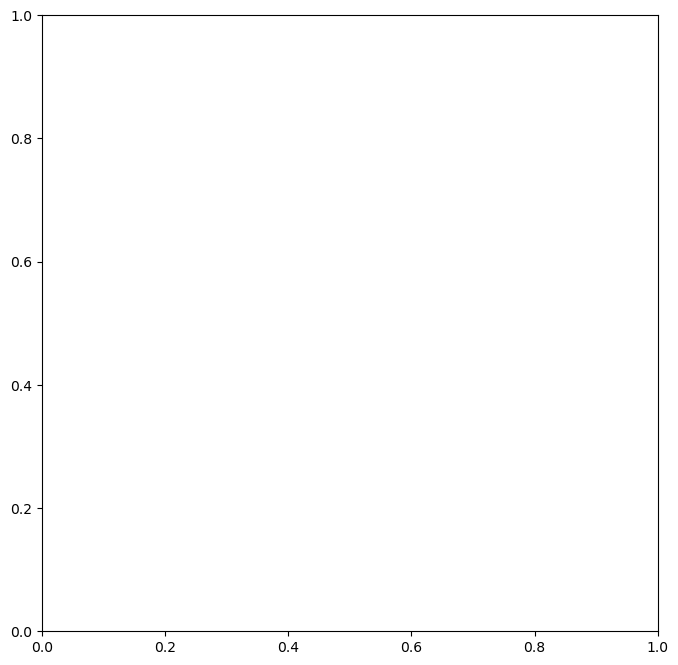

In [16]:
race_counts = df

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(dict0.keys(), labels=dict0.values(), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Races in Texas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [18]:
dict0

{'American Indian or Alaska Native': 57348,
 'Asian': 610805,
 'Black or African American': 637556,
 'Free Form Text Only': 1885,
 'Joint': 169445,
 'Native Hawaiian or Other Pacific Islander': 15930,
 'Race Not Available': 2465087,
 'White': 4907003,
 '2 or more minority races': 15599}

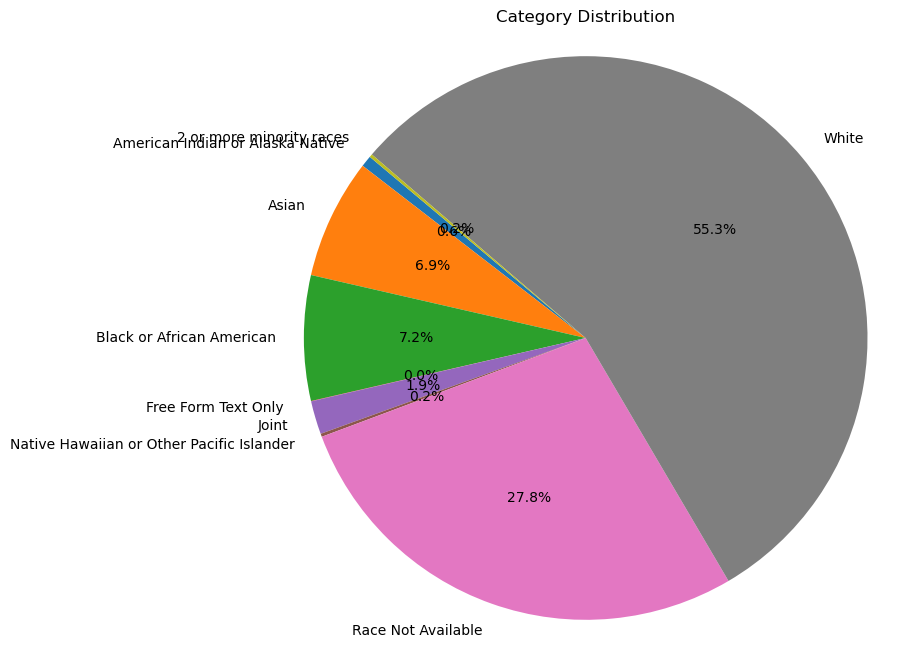

In [17]:
import matplotlib.pyplot as plt

# Assuming dict0 is a dictionary with categories as keys and counts as values
dict0 

# Extracting the data for the pie chart
labels = dict0.keys()
sizes = dict0.values()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()